In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

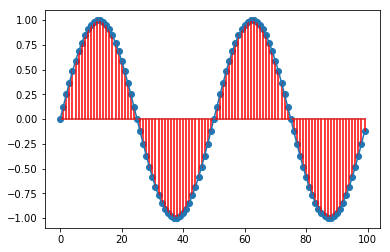

In [2]:
fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in np.arange(fs)]

#this instruction can only be used with IPython Notbook. 
% matplotlib inline
# showing the exact location of the smaples
plt.stem(x,y, 'r', )
plt.plot(x,y)

In [3]:
import pandas as pd
from pandas import concat
# create X/y pairs
df['Close'] = pd.DataFrame(y)
#df= concat([df.shift(3), df, axis=1)
df['Avg5'] =pd.Series.rolling(df['Close'],5).mean()
df.dropna(inplace=True)
plt.plot(df)
#df

NameError: name 'df' is not defined

In [ ]:
for( )
plt.stem(x,y, 'r', )
plt.plot(x,y)

In [7]:
# Quick example how rise work
import pandas as pd
from pandas import read_csv

item='GM'
file_path='./data/'+item +'.csv'
print("Read from file")  
df = read_csv(file_path)
df['Date']=pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

df=df[['Close']].iloc[-30:] 
df=df.sort_index(ascending=False)
df['window']=pd.Series.rolling(df['Close'],5).max()
df['Rise1'] = (  pd.Series.rolling(df['Close'],5).max()-df['Close'] >df['Close']*0.04)*1
#df['yhat'] =yhat
#df=df.sort_index(ascending=True)
df

Read from file


,Close,window,Rise1
Date,,,
2017-11-16,43.60,NaN,0
2017-11-15,42.86,NaN,0
2017-11-14,43.00,NaN,0
2017-11-13,43.57,NaN,0
2017-11-10,42.66,43.60,0
2017-11-09,42.11,43.57,0
2017-11-08,42.11,43.57,0
2017-11-07,41.70,43.57,1
2017-11-06,42.14,42.66,0


In [ ]:
# convert series to supervised learning
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
from sklearn.preprocessing import MinMaxScaler


,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
4,C1,10,C2,12,C3,13,C4,14,C5,15
5,C2,12,C3,13,C4,14,C5,15,C6,16
6,C3,13,C4,14,C5,15,C6,16,C7,17
7,C4,14,C5,15,C6,16,C7,17,C8,18
8,C5,15,C6,16,C7,17,C8,18,C8,18
9,C6,16,C7,17,C8,18,C8,18,C9,18
10,C7,17,C8,18,C8,18,C9,18,C10,18
11,C8,18,C8,18,C9,18,C10,18,C11,18


In [20]:
# import pandas as pd
import numpy as np
import pandas as pd

values = np.array([[  10, 20, 30, 40, 50, 60, 0 ],
                   [  11, 21, 31, 41, 51, 61 ,0 ],
                   [  12, 22, 32, 42, 52, 62 ,1 ],
                   [  13, 23, 33, 43, 53, 63 ,1 ],
                   [  14, 24, 34, 44, 54, 64 ,1 ],
                   [  15, 25, 35, 45, 55, 65 ,0 ],
                   [  16, 26, 36, 46, 56, 66 ,0 ],
                   [  17, 27, 37, 47, 57, 67 ,0 ]
                  ])
values[1]

reframed = series_to_supervised(values,3, 1)
reframed= pd.DataFrame(reframed)
#print(reframed)
print( reframed.iloc[0],reframed.iloc[1])

var1(t-3)    10.0
var2(t-3)    20.0
var3(t-3)    30.0
var4(t-3)    40.0
var5(t-3)    50.0
var6(t-3)    60.0
var7(t-3)     0.0
var1(t-2)    11.0
var2(t-2)    21.0
var3(t-2)    31.0
var4(t-2)    41.0
var5(t-2)    51.0
var6(t-2)    61.0
var7(t-2)     0.0
var1(t-1)    12.0
var2(t-1)    22.0
var3(t-1)    32.0
var4(t-1)    42.0
var5(t-1)    52.0
var6(t-1)    62.0
var7(t-1)     1.0
var1(t)      13.0
var2(t)      23.0
var3(t)      33.0
var4(t)      43.0
var5(t)      53.0
var6(t)      63.0
var7(t)       1.0
Name: 3, dtype: float64 var1(t-3)    11.0
var2(t-3)    21.0
var3(t-3)    31.0
var4(t-3)    41.0
var5(t-3)    51.0
var6(t-3)    61.0
var7(t-3)     0.0
var1(t-2)    12.0
var2(t-2)    22.0
var3(t-2)    32.0
var4(t-2)    42.0
var5(t-2)    52.0
var6(t-2)    62.0
var7(t-2)     1.0
var1(t-1)    13.0
var2(t-1)    23.0
var3(t-1)    33.0
var4(t-1)    43.0
var5(t-1)    53.0
var6(t-1)    63.0
var7(t-1)     1.0
var1(t)      14.0
var2(t)      24.0
var3(t)      34.0
var4(t)      44.0
var5(t)      54.0
var6

In [23]:
from sklearn.preprocessing import MinMaxScaler

# ensure all data is float
values = values.astype('float')
#drop columns to simplify test

# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
print(scaled)

[[ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.14285714  0.14285714  0.14285714  0.14285714  0.14285714  0.14285714
   0.        ]
 [ 0.28571429  0.28571429  0.28571429  0.28571429  0.28571429  0.28571429
   1.        ]
 [ 0.42857143  0.42857143  0.42857143  0.42857143  0.42857143  0.42857143
   1.        ]
 [ 0.57142857  0.57142857  0.57142857  0.57142857  0.57142857  0.57142857
   1.        ]
 [ 0.71428571  0.71428571  0.71428571  0.71428571  0.71428571  0.71428571
   0.        ]
 [ 0.85714286  0.85714286  0.85714286  0.85714286  0.85714286  0.85714286
   0.        ]
 [ 1.          1.          1.          1.          1.          1.          0.        ]]


In [17]:
import datetime 
from pandas import read_csv
from pandas import concat
import os.path


start = datetime.datetime(2016, 1, 1)
end = datetime.datetime.now()
file_path='./data/aapl.csv'

print("Read from file")  
df = read_csv(file_path)
df.set_index("Date",inplace=True)
   
##
print(df.shape)
print(df.head())

Read from file
(974, 6)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  79.382858  79.575714  78.860001  79.018570  73.522530   58671200
2014-01-03  78.980003  79.099998  77.204285  77.282860  71.907555   98116900
2014-01-06  76.778572  78.114288  76.228569  77.704285  72.299644  103152700
2014-01-07  77.760002  77.994286  76.845711  77.148575  71.782608   79302300
2014-01-08  76.972855  77.937141  76.955711  77.637146  72.237190   64632400


In [20]:
reframed =series_to_supervised(df, 2, 1)
print(reframed.head())

            var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  \
Date                                                                
2014-01-06  79.382858  79.575714  78.860001  79.018570  73.522530   
2014-01-07  78.980003  79.099998  77.204285  77.282860  71.907555   
2014-01-08  76.778572  78.114288  76.228569  77.704285  72.299644   
2014-01-09  77.760002  77.994286  76.845711  77.148575  71.782608   
2014-01-10  76.972855  77.937141  76.955711  77.637146  72.237190   

              var6(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  \
Date                                                                  
2014-01-06   58671200.0  78.980003  79.099998  77.204285  77.282860   
2014-01-07   98116900.0  76.778572  78.114288  76.228569  77.704285   
2014-01-08  103152700.0  77.760002  77.994286  76.845711  77.148575   
2014-01-09   79302300.0  76.972855  77.937141  76.955711  77.637146   
2014-01-10   64632400.0  78.114288  78.122856  76.478569  76.645714   

            var5(t

In [22]:
# Stochastic Oscilator %K
def STOK(close, low, high, n): 
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 return STOK

# Stochastic Oscilator %D
def STOD(close, low, high, n):
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 STOD = pd.Series.rolling(STOK, 3).mean()
 return STOD

from sklearn.preprocessing import LabelEncoder
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df['Avg5'] =pd.Series.rolling(df['Close'],5).mean()
df['Avg10'] =pd.Series.rolling(df['Close'],10).mean()
df['Rise'] = (df['Close'] - pd.Series.rolling(df['Close'],5).min() > 3 )*1
#df.tail()
df.shape

(974, 11)

In [31]:
reframed =series_to_supervised(df, 1, 1)
print(reframed.head())

            var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  \
Date                                                                
2014-01-27  79.142860  79.374283  77.821426  78.010002  72.584122   
2014-01-28  78.581429  79.257141  77.964287  78.642860  73.172943   
2014-01-29  72.680000  73.571426  71.724289  72.357140  67.324432   
2014-01-30  71.992859  72.481430  71.231430  71.535713  66.560143   
2014-01-31  71.791428  72.357140  70.957146  71.397141  66.431213   

              var6(t-1)  var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  \
Date                                                                   
2014-01-27  107338700.0  53.397124  70.492495  78.385713   78.145286   
2014-01-28  138719700.0  68.007964  69.382161  78.666571   78.396143   
2014-01-29  266380800.0   7.620778  43.008622  77.450285   77.978571   
2014-01-30  125702500.0   3.458885  26.362542  76.000000   77.326571   
2014-01-31  169625400.0   4.850340   5.310001  74.388571   76.503999   

           

In [32]:
def getData(item):
    start = datetime.datetime(2016, 1, 1)
    end = datetime.datetime.now()
    #print( start,end) 
    file_path='./data/'+item +'.csv'
    if not os.path.exists(file_path):
        print("Empty set")
        df =web.DataReader(item,'yahoo',start,end)  
        df=df.round(2)
        
        df.to_csv('./data/' + item + '.csv')
        df['Date']=pd.to_datetime(df['Date']) #important for sorting
        df.set_index("Date",inplace=True)
        #df.index.name = 'Date'
    else:
        print("Read from file")  
        df = read_csv(file_path)
        df['Date']=pd.to_datetime(df['Date']) #important for sorting
        df.set_index("Date",inplace=True)

        #end = datetime.datetime.now()
        lastDate=df.index[df.shape[0]-1] #last recorded day
        #d1 = datetime.datetime.strptime(lastDate, "%Y-%m-%d")  
        #d1 = datetime.datetime.strptime(lastDate)
        #print(d1,end )
        if( lastDate < end - datetime.timedelta(days=2)): # dont update on Sat or Sun
            print("Updating")  
            d2 = d1 + datetime.timedelta(days=1)
            #print(d2,end )
            df1 =web.DataReader(item,'yahoo',d2,end)  
            updateDate=df1.index[df1.shape[0]-1]
            print(updateDate , d1)
            if (updateDate !=  d1): #yahoo gives unwanted records
                df1=df1.round(2)
                df=pd.concat([df,df1])
                df.index= pd.to_datetime(df.index, format="%Y-%m-%d") # drop time 
                df.to_csv('./data/' + item + '.csv')
            else:
                print("No need to update")
    return df


In [33]:
from pandas import read_csv
import datetime 
from pandas import read_csv
from pandas import concat
import os.path

df = read_csv('./data/List.csv', header=None)

In [ ]:
for index in range(df.shape[0]):
    item=df.iloc[index,0]
    print ('Current item :', item)
    getData(item)
    

In [3]:
from pandas_datareader import data as web
dfg = web.DataReader('F', 'google', '2013/1/1', '2014/3/1')
dfg

RemoteDataError: Unable to read URL: http://www.google.com/finance/historical?q=F&startdate=Jan+01%2C+2013&enddate=Mar+01%2C+2014&output=csv

In [1]:
import dropbox


ModuleNotFoundError: No module named 'dropbox'